<a href="https://colab.research.google.com/github/yashguptasln/Invere-Kinematics-Solutions-by-Neural-Network/blob/master/Mywork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
##Creation of dataset
import math as m
import random
import csv

l1 = l2 = l3 = 8

def threeLinkManipulatorFile():
    with open('threeLink.csv', 'w') as csvFile:
        row = ['q1','q2','q3','xe','ye','thetae']
        csv.writer(csvFile).writerow(row)
        for i in range(1, 10000):
            
            q1 = round(random.uniform(0,m.pi),2)
            q2= round(random.uniform(-m.pi, 0),2)
            q3= round(random.uniform(-m.pi/2,m.pi/2))
            
            #xintra= round(l1*m.cos(q1)+ l2*m.cos(q1+q2),2)
            #yintra= round(l1*m.sin(q1)+ l2*m.sin(q1+q2),2)
            thetae=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            #if( xintra>0 and yintra>0 and thetae>0 and thetae<90):
                
            xe= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            ye= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            
            
            row = [q1,q2,q3,xe,ye,thetae]
            csv.writer(csvFile).writerow(row)
                
    csvFile.close()
    
threeLinkManipulatorFile()

(9999, 6)


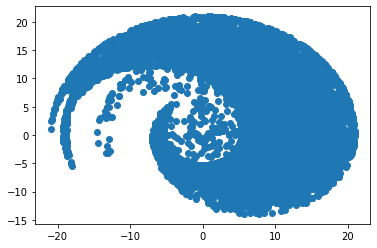

In [0]:
## Verifying the point are within 1st quadrant
import matplotlib.pyplot as plt
import pandas as pd

data=pd.read_csv('threeLink.csv')
print(data.shape)

plt.scatter(data['xe'],data['ye'])
plt.show()

In [0]:
#Removing duplications
'''print(data.shape)
length=len(data)
for i in range(length):
  for j in range(i):
    if i!=j and data.iloc[i,3]==data.iloc[j,3] and data.iloc[i,4]==data.iloc[j,4]:
      data.drop(i)
      length-=1
data.shape'''

'print(data.shape)\nlength=len(data)\nfor i in range(length):\n  for j in range(i):\n    if i!=j and data.iloc[i,3]==data.iloc[j,3] and data.iloc[i,4]==data.iloc[j,4]:\n      data.drop(i)\n      length-=1\ndata.shape'

In [0]:
 from sklearn.model_selection import train_test_split
x = data.iloc[:,3:].values
y =data.iloc[:,0:3].values
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.01)

In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

classifier = Sequential()
classifier.add(Dense(units = 3,input_dim = 3,kernel_initializer = 'uniform'))
#classifier.add(keras.layers.Dropout(0.2))
classifier.add(Dense(units = 100,kernel_initializer = 'uniform',activation = 'tanh'))
#classifier.add(keras.layers.Dropout(0.2))
classifier.add(Dense(units = 3,kernel_initializer = 'uniform',activation='linear'))
classifier.compile(optimizer='adam',loss=tf.keras.losses.MeanSquaredError(),metrics=['accuracy'])

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.


In [0]:
history=classifier.fit(x,y ,epochs=50, validation_split=0.1, shuffle=True)

Train on 8999 samples, validate on 1000 samples
Epoch 1/50
8999/8999 [==============================] - 1s 69us/step - loss: 0.8815 - accuracy: 0.8544 - val_loss: 0.4251 - val_accuracy: 0.8860
Epoch 2/50
8999/8999 [==============================] - 0s 38us/step - loss: 0.3417 - accuracy: 0.9051 - val_loss: 0.2689 - val_accuracy: 0.9100
Epoch 3/50
8999/8999 [==============================] - 0s 37us/step - loss: 0.2301 - accuracy: 0.9174 - val_loss: 0.1966 - val_accuracy: 0.9120
Epoch 4/50
8999/8999 [==============================] - 0s 36us/step - loss: 0.1626 - accuracy: 0.9165 - val_loss: 0.1434 - val_accuracy: 0.9230
Epoch 5/50
8999/8999 [==============================] - 0s 35us/step - loss: 0.1261 - accuracy: 0.9215 - val_loss: 0.1214 - val_accuracy: 0.9310
Epoch 6/50
8999/8999 [==============================] - 0s 36us/step - loss: 0.1106 - accuracy: 0.9248 - val_loss: 0.1092 - val_accuracy: 0.9350
Epoch 7/50
8999/8999 [==============================] - 0s 35us/step - loss: 0.101

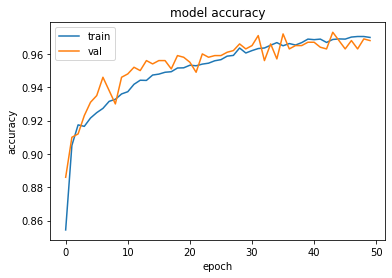

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

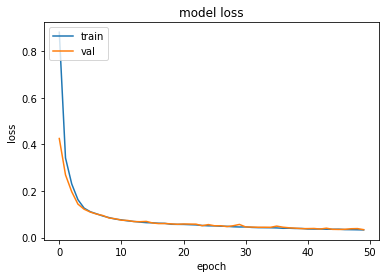

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
# Testing model for single input
import numpy as np
x1=np.array([[4.2426, 4.2426, 45]])
y=classifier.predict(x1)
a=float(y[0][0])
b=float(y[0][1])
c=float(y[0][2])
print(a,b,c)


2.9142098426818848 -3.3898375034332275 1.320246696472168


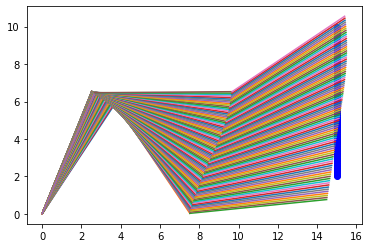

In [0]:
## trying to plot x=10 line
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import imageio as img
import glob,os

def oneFile():
    with open('one.csv', 'w') as csvFile:
        row = ['q1','q2','q3','xe','ye','thetae']
        csv.writer(csvFile).writerow(row)
        arr=np.linspace(1,10,100)
        for j in arr:
            i= 15
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])
            
            xintra= round(l1*m.cos(q1)+ l2*m.cos(q1+q2),2)
            yintra= round(l1*m.sin(q1)+ l2*m.sin(q1+q2),2)
            thetae=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            if( xintra>0 and yintra>0 and thetae>0 and thetae<90 and q1>0):
                row = [q1,q2,q3,i,j,theta]
                plt.plot(i,j,'bo')
                csv.writer(csvFile).writerow(row)
                
    csvFile.close()
    
oneFile()

def plot_point(point, angle, length):
    x, y = point
    endy = y + length * m.sin(angle)
    endx = x + length * m.cos(angle)
    #plt.xlim([0,6])
    #plt.ylim([0,6])
    plt.plot([x, endx], [y, endy])
    return endx,endy

filename = 'one.csv'
data = np.loadtxt(filename, delimiter=",", skiprows=1)

ang1 = [row[0] for row in data]
ang2 = [row[1] for row in data]
ang3 = [row[2] for row in data]

point = [0,0]
c = 1
images = []
for i in range(len(data)):
    fileName = 'Figure/one' + str(c) + '.png'
    point = plot_point([0,0],ang1[i],l1)
    point = plot_point(point,ang1[i]+ang2[i],l2)
    plot_point(point,ang1[i]+ang2[i]+ang3[i],l3)
    plt.savefig(fileName)
    images.append(img.imread(fileName))
    c = c+1
    
img.mimsave('Figure/animateone.gif',images) 
import glob, os
for f in glob.glob("Figure/one*.png"):
    os.remove(f)

'img.mimsave(\'Figure/animatecircle.gif\',images) \nimport glob, os\nfor f in glob.glob("Figure/circle*.png"):\n    os.remove(f)'

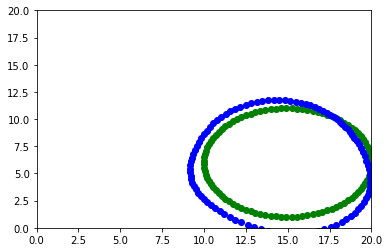

In [0]:
## trying to plot circle
def circleFile():
    with open('circle.csv', 'w') as csvFile:
        row = ['q1','q2','q3','xe','ye','thetae']
        csv.writer(csvFile).writerow(row)
        Xc = 15
        Yc = 6
        r = 5
        data_points =100
        points = np.linspace(0,360,num =data_points)
        for p in points:
            i=Xc + r*m.cos(np.radians(p))
            j=Yc + r*m.sin(np.radians(p))
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])
            
            '''xintra= round(l1*m.cos(q1)+ l2*m.cos(q1+q2),2)
            yintra= round(l1*m.sin(q1)+ l2*m.sin(q1+q2),2)
            thetae=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            if(yintra>0 and thetae>0 and thetae<90 and q1>0):'''
            row = [q1,q2,q3,i,j,theta]
            #plt.xlim([0,20])
            #plt.ylim([0,20])
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
                
    csvFile.close()
    
circleFile()

def plot_point(point, angle, length):
    x, y = point
    endy = y + length * m.sin(angle)
    endx = x + length * m.cos(angle)
    #plt.xlim([0,6])
    #plt.ylim([0,6])
    #plt.plot([x, endx], [y, endy])
    return endx,endy

filename = 'circle.csv'
data = np.loadtxt(filename, delimiter=",", skiprows=1)


ang1 = [row[0] for row in data]
ang2 = [row[1] for row in data]
ang3 = [row[2] for row in data]

point = [0,0]
c = 1
images = []
for i in range(len(data)):
    #fileName = 'Figure/circle' + str(c) + '.png'
    point = plot_point([0,0],ang1[i],l1)
    point = plot_point(point,ang1[i]+ang2[i],l2)
    point=plot_point(point,ang1[i]+ang2[i]+ang3[i],l3)
    plt.xlim([0,20])
    plt.ylim([0,20])
    plt.plot(point[0],point[1],'bo')
    #plot_point(point,ang1[i]+ang2[i]+ang3[i],l3)
    #plt.savefig(fileName)
    #images.append(img.imread(fileName))
    #c = c+1
    
'''img.mimsave('Figure/animatecircle.gif',images) 
import glob, os
for f in glob.glob("Figure/circle*.png"):
    os.remove(f)'''

'img.mimsave(\'Figure/animatecircle.gif\',images) \nimport glob, os\nfor f in glob.glob("Figure/circle*.png"):\n    os.remove(f)'

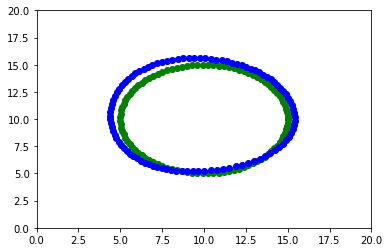

In [0]:
## trying to plot circle
def circleFile():
    with open('circle.csv', 'w') as csvFile:
        row = ['q1','q2','q3','xe','ye','thetae']
        csv.writer(csvFile).writerow(row)
        Xc = 10
        Yc = 10
        r = 5
        data_points =100
        points = np.linspace(0,360,num =data_points)
        for p in points:
            i=Xc + r*m.cos(np.radians(p))
            j=Yc + r*m.sin(np.radians(p))
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])
            
            '''xintra= round(l1*m.cos(q1)+ l2*m.cos(q1+q2),2)
            yintra= round(l1*m.sin(q1)+ l2*m.sin(q1+q2),2)
            thetae=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            if(yintra>0 and thetae>0 and thetae<90 and q1>0):'''
            row = [q1,q2,q3,i,j,theta]
            #plt.xlim([0,20])
            #plt.ylim([0,20])
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
                
    csvFile.close()
    
circleFile()

def plot_point(point, angle, length):
    x, y = point
    endy = y + length * m.sin(angle)
    endx = x + length * m.cos(angle)
    #plt.xlim([0,6])
    #plt.ylim([0,6])
    #plt.plot([x, endx], [y, endy])
    return endx,endy

filename = 'circle.csv'
data = np.loadtxt(filename, delimiter=",", skiprows=1)


ang1 = [row[0] for row in data]
ang2 = [row[1] for row in data]
ang3 = [row[2] for row in data]

point = [0,0]
c = 1
images = []
for i in range(len(data)):
    #fileName = 'Figure/circle' + str(c) + '.png'
    point = plot_point([0,0],ang1[i],l1)
    point = plot_point(point,ang1[i]+ang2[i],l2)
    point=plot_point(point,ang1[i]+ang2[i]+ang3[i],l3)
    plt.xlim([0,20])
    plt.ylim([0,20])
    plt.plot(point[0],point[1],'bo')
    #plot_point(point,ang1[i]+ang2[i]+ang3[i],l3)
    #plt.savefig(fileName)
    #images.append(img.imread(fileName))
    #c = c+1
    
'''img.mimsave('Figure/animatecircle.gif',images) 
import glob, os
for f in glob.glob("Figure/circle*.png"):
    os.remove(f)'''

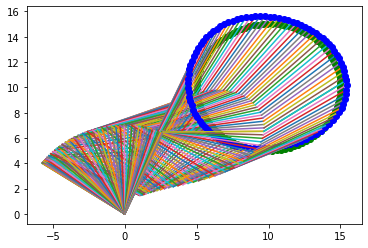

In [0]:
## trying to plot circle
def circleFile():
    with open('circle.csv', 'w') as csvFile:
        row = ['q1','q2','q3','xe','ye','thetae']
        csv.writer(csvFile).writerow(row)
        Xc = 10
        Yc = 10
        r = 5
        data_points =100
        points = np.linspace(0,360,num =data_points)
        for p in points:
            i=Xc + r*m.cos(np.radians(p))
            j=Yc + r*m.sin(np.radians(p))
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])
            
            xintra= round(l1*m.cos(q1)+ l2*m.cos(q1+q2),2)
            yintra= round(l1*m.sin(q1)+ l2*m.sin(q1+q2),2)
            thetae=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            if(yintra>0 and thetae>0 and thetae<90 and q1>0):
              row = [q1,q2,q3,i,j,theta]
              #plt.xlim([0,20])
              #plt.ylim([0,20])
              plt.plot(i,j,'go')
              csv.writer(csvFile).writerow(row)
                
    csvFile.close()
    
circleFile()

def plot_point(point, angle, length):
    x, y = point
    endy = y + length * m.sin(angle)
    endx = x + length * m.cos(angle)
    #plt.xlim([0,6])
    #plt.ylim([0,6])
    plt.plot([x, endx], [y, endy])
    return endx,endy

filename = 'circle.csv'
data = np.loadtxt(filename, delimiter=",", skiprows=1)


ang1 = [row[0] for row in data]
ang2 = [row[1] for row in data]
ang3 = [row[2] for row in data]

point = [0,0]
c = 1
images = []
for i in range(len(data)):
    fileName = 'Figure/circle' + str(c) + '.png'
    point = plot_point([0,0],ang1[i],l1)
    point = plot_point(point,ang1[i]+ang2[i],l2)
    point=plot_point(point,ang1[i]+ang2[i]+ang3[i],l3)
    #plt.xlim([0,20])
    #plt.ylim([0,20])
    plt.plot(point[0],point[1],'bo')
    #plot_point(point,ang1[i]+ang2[i]+ang3[i],l3)
    plt.savefig(fileName)
    images.append(img.imread(fileName))
    c = c+1
    
img.mimsave('Figure/animatecircle.gif',images) 
import glob, os
for f in glob.glob("Figure/circle*.png"):
    os.remove(f)